------------------------------------------------------------------------------------------------------------------------------------------------------

## PEAK AND PEDESTAL VARIABLES NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
import sys; sys.path.insert(0, '../'); from lib import *;
from scipy import stats as st
figure_features()

In [2]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [16]:
INPUT_FILE = "Feb22_2"; OV = 1; PRESET ="ALL"
info = read_input_file(INPUT_FILE)  # Read input file
channels = [0,1,6]

#-------------------------------- LOAD RUNS ---------------------------------#
run_keys = ["CALIB_RUNS","LIGHT_RUNS","ALPHA_RUNS","MUONS_RUNS","NOISE_RUNS"]
run_keys = ["CALIB_RUNS","ALPHA_RUNS"]
nruns = dict.fromkeys(run_keys)
for key in run_keys:
    try:               nruns[key] = info[key][OV] # Store runs in dictionary
    except IndexError: nruns.pop(key)
print(nruns)

runs = dict.fromkeys(nruns.keys())
for run in runs: runs[run] = load_npy(np.asarray([nruns[run]]).astype(int),np.asarray(channels).astype(int),preset=PRESET,info=info,compressed=True)
#----------------------------------------------------------------------------#

{'CALIB_RUNS': 2, 'ALPHA_RUNS': 25}
load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!



## HIST1D

### 1. AMPLITUDE PLOT TO DEFINE THRESHOLDS

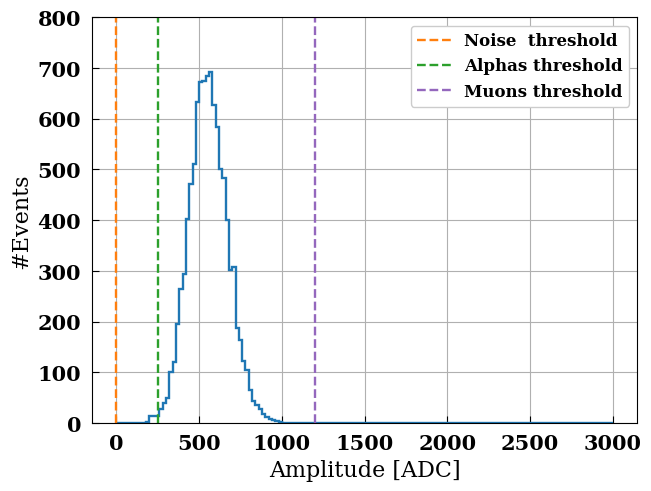

In [4]:
channel = 0
my_runs = runs["ALPHA_RUNS"][runs["ALPHA_RUNS"]["NRun"][0]]

# plt.figure(dpi=200)
plt.hist(my_runs[channel]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",color="C0",linewidth=1.7)
# plt.hist(my_runs["Alpha"][0]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",color="C0",label="SiPM#289")
# plt.hist(my_runs["Alpha"][1]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",label="SiPM#290")
# plt.hist(my_runs["Alpha"][6]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",label="X-ARAPUCA")

plt.vlines(0,   ymin=0,ymax=800,color="C1", linestyles="dashed",linewidth=1.7,label="Noise  threshold")
plt.vlines(250, ymin=0,ymax=800,color="C2", linestyles="dashed",linewidth=1.7,label="Alphas threshold")
plt.vlines(1200,ymin=0,ymax=800,color="C4", linestyles="dashed",linewidth=1.7,label="Muons threshold")

plt.ylim([0,800])
plt.grid()
plt.legend()
plt.ylabel("#Events")
plt.xlabel("Amplitude [ADC]")
plt.show()

### 2. PeakTime

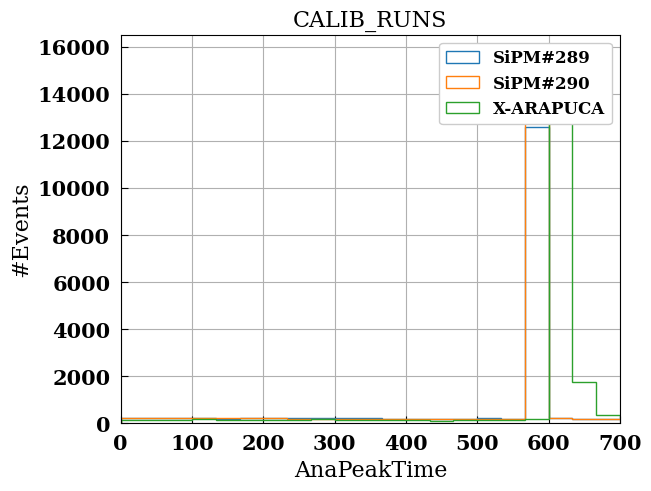

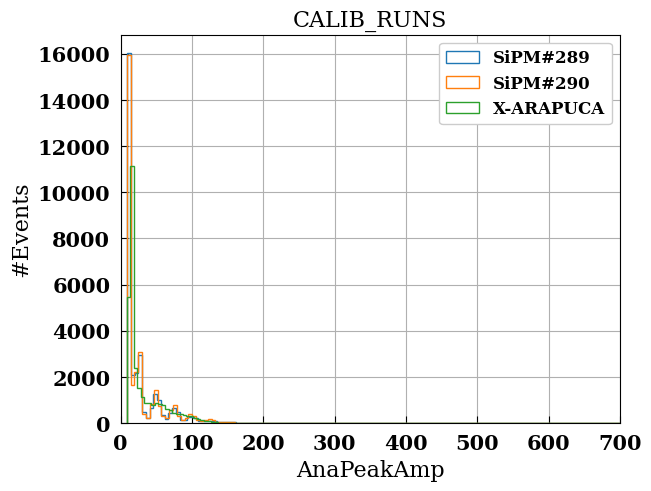

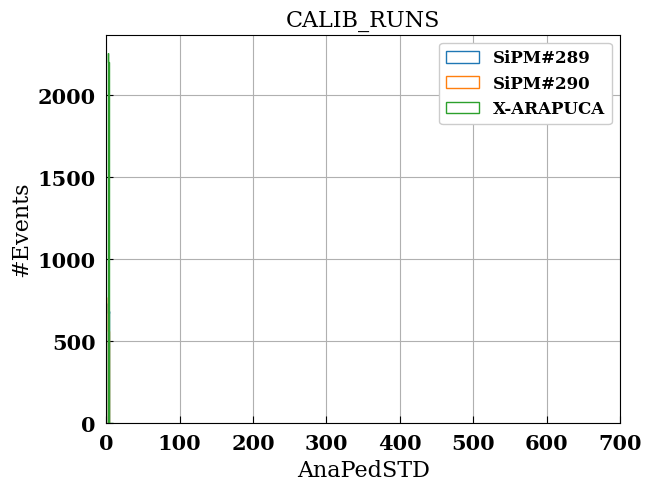

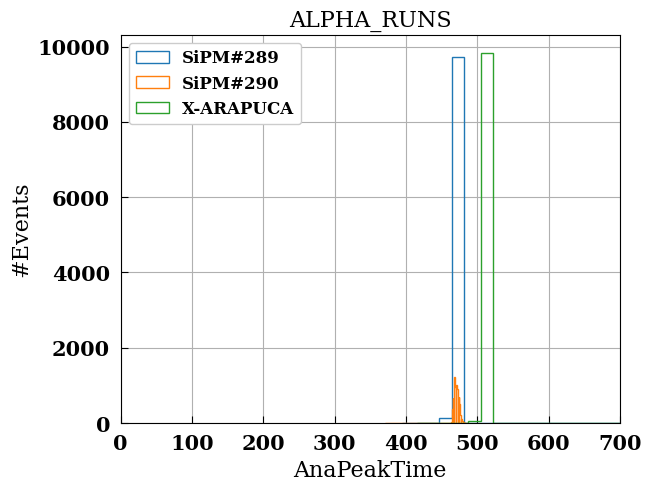

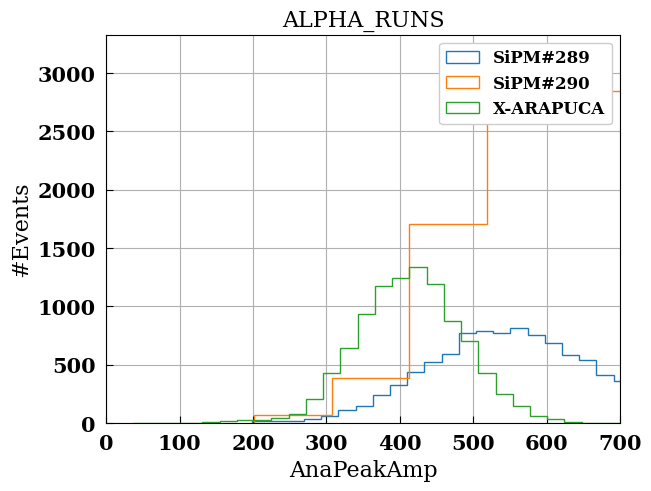

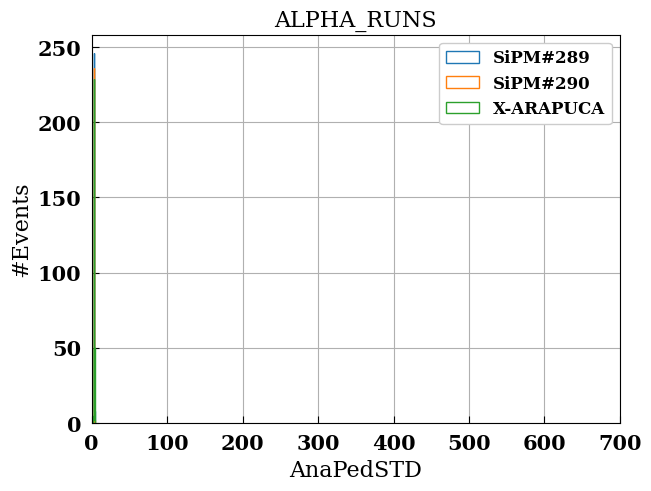

In [10]:
channels = [0,1,6]; labels = ["SiPM#289","SiPM#290","X-ARAPUCA"]; keys2plot = ["AnaPeakTime","AnaPeakAmp","AnaPedSTD"]
for RUN2PLOT in ["CALIB_RUNS", "ALPHA_RUNS"]:
    my_runs = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]]
    for key2plot in keys2plot:
        for c,ch in enumerate(channels):
        # vis_var_hist(my_runs_calib, [key], OPT={"SHOW":False})
            plt.hist(my_runs[ch][key2plot],bins=150,histtype="step",label=labels[c])

            # mode = st.mode(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key2plot])[0]
            # plt.vlines(mode-50,ymin=0,ymax=800,color="C3", linestyles="dashed",linewidth=1.7,label="min")
            # plt.vlines(mode+150,ymin=0,ymax=800,color="C4", linestyles="dashed",linewidth=1.7,label="max")
        plt.grid()
        plt.legend()
        # plt.semilogy()
        plt.ylabel("#Events")
        plt.xlabel(key2plot)
        plt.title(RUN2PLOT)
        plt.show()

### 3. Charge Distributions 

In [7]:
# plt.figure(dpi=200)
plt.hist(runs["ALPHA_RUNS"][runs["ALPHA_RUNS"]["NRun"][0]][0]["AnaChargeAveRange"],
         bins=150,range=[0,10000],histtype="step",color="C0",linewidth=1.7)
plt.show()


KeyError: 'AnaChargeAveRange'

## HIST2D

### 1. CHARGE VS AMPLITUDE --> CUTS

22867.560000000143
9.05999999999949


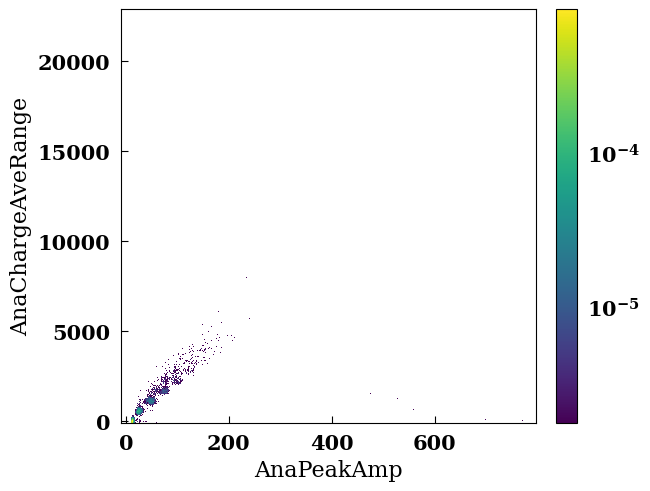

27208.18999999995
8.450000000000728


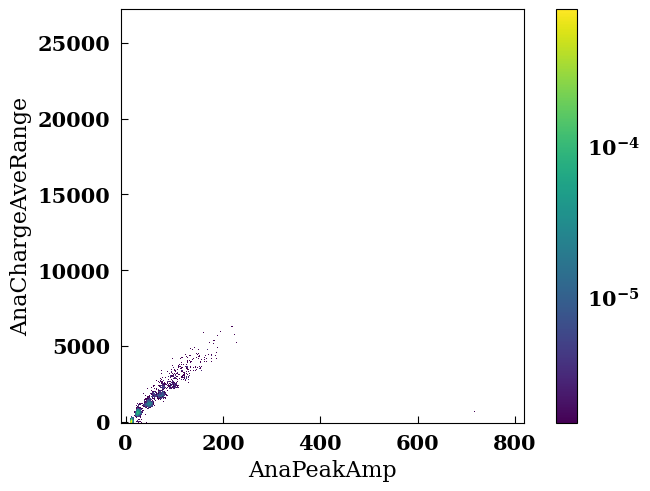

54823.799999999916
8.6899999999996


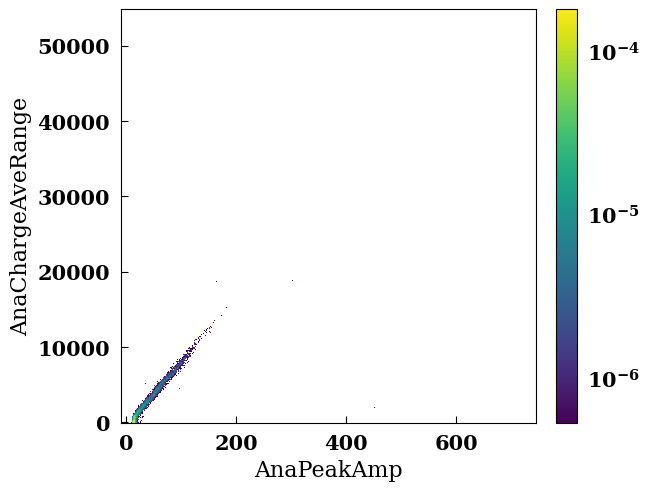

In [4]:
# %matplotlib ipympl

RUN2PLOT = "CALIB_RUNS"; ch = 0
xvar = "AnaPeakAmp"
yvar = "AnaChargeAveRange"
plt.ioff()
for c,ch in enumerate(channels):
    plt.figure()
    plt.hist2d(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar],
               runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar],
               bins=1000,density=True, cmap = viridis, norm=LogNorm())
    # plt.xlim([-10,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar])])
    # plt.ylim([-100,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar])])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.colorbar()
    plt.ion()
    plt.show()

795.6299999999992


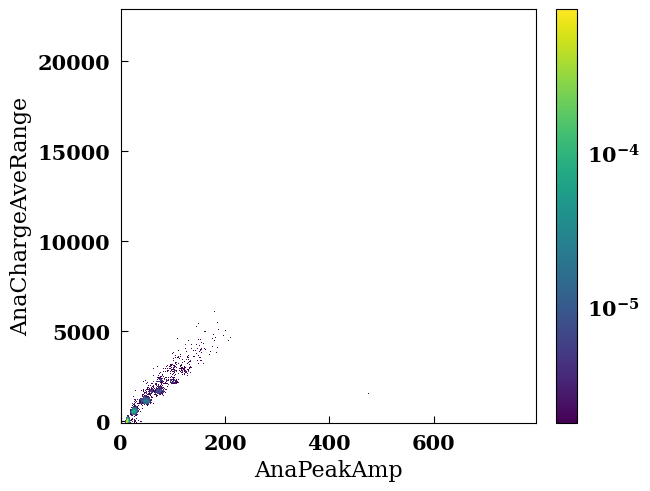

In [ ]:
%matplotlib inline

RUN2PLOT = "CALIB_RUNS"; ch = 0
xvar = "AnaPeakAmp"
yvar = "AnaChargeAveRange"
for c,ch in enumerate(channels):
    plt.figure()
    plt.hist2d(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar],
               runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar],
               bins=1000,density=True, cmap = viridis, norm=LogNorm())
    print(max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar]))
    plt.xlim([0,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar])])
    plt.ylim([-100,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar])])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.colorbar()
    plt.show()

## PERSISTENCE 

In [22]:
from scipy import stats as st

In [43]:
RUN2PLOT = "CALIB_RUNS"; ch = 0; key_peaktime = "RawPeakTime"

peak_time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peaktime]
ptime_min = peak_time>(st.mode(peak_time)[0]-20)
ptime_max = peak_time<(st.mode(peak_time)[0]+80)

CUT_ptime = ptime_min * ptime_max
print("CUT peaktime min: %0.2f"%(len(peak_time[ptime_min==True])*100/len(peak_time)))
print("CUT peaktime max: %0.2f"%(len(peak_time[ptime_max==True])*100/len(peak_time)))
print("CUT peaktime min_max: %0.2f"%(len(peak_time[CUT_ptime])*100/len(peak_time)))

CUT peaktime min: 89.49
CUT peaktime max: 52.73
CUT peaktime min_max: 42.22


In [229]:
RUN2PLOT = "CALIB_RUNS"; ch = 0; key_peaktime = "AnaPeakTime"

peak_time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peaktime]
ptime_min = peak_time>4.19e-6
ptime_max = peak_time<4.22e-6

CUT_ptime = ptime_min * ptime_max
print("CUT peaktime min: %0.2f"%(len(peak_time[ptime_min==True])*100/len(peak_time)))
print("CUT peaktime max: %0.2f"%(len(peak_time[ptime_max==True])*100/len(peak_time)))
print("CUT peaktime min_max: %0.2f"%(len(peak_time[CUT_ptime])*100/len(peak_time)))

CUT peaktime min: 99.88
CUT peaktime max: 0.12
CUT peaktime min_max: 0.00


In [53]:
RUN2PLOT = "CALIB_RUNS"; ch = 6; key_peakamp = "RawPeakAmp"

peak_amp = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peakamp]
pamp_min = peak_amp>4200
pamp_max = peak_amp<4300

CUT_pamp = pamp_min * pamp_max
print("CUT peak_amp min: %0.2f"%(len(peak_amp[pamp_min==True])*100/len(peak_amp)))
print("CUT peak_amp max: %0.2f"%(len(peak_amp[pamp_max==True])*100/len(peak_amp)))
print("CUT peak_amp min_max: %0.2f"%(len(peak_amp[CUT_pamp])*100/len(peak_amp)))

CUT peak_amp min: 100.00
CUT peak_amp max: 97.64
CUT peak_amp min_max: 97.64


In [231]:
RUN2PLOT = "CALIB_RUNS"; ch = 0; key_pedstd = "AnaPedSTD"

ped_std = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_pedstd]
std_min = ped_std>-1
std_max = ped_std<4.8

CUT_std = std_min * std_max
print("CUT peak_amp min: %0.2f"%(len(ped_std[std_min==True])*100/len(ped_std)))
print("CUT peak_amp max: %0.2f"%(len(ped_std[std_max==True])*100/len(ped_std)))
print("CUT peak_amp min_max: %0.2f"%(len(ped_std[CUT_std])*100/len(ped_std)))

CUT peak_amp min: 100.00
CUT peak_amp max: 100.00
CUT peak_amp min_max: 100.00


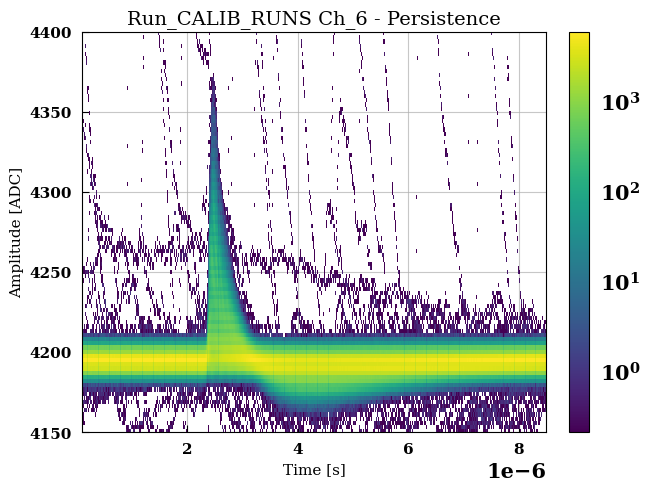

In [18]:
RUN2PLOT = "CALIB_RUNS"; ch = 6

data_flatten = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"].flatten() ##### Flatten the data array
# data_flatten = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"][CUT_ptime].flatten() ##### Flatten the data array
time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["Sampling"]*np.arange(len(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"][0])) # Time array
time_flatten = np.array([time] * int(len(data_flatten)/len(time))).flatten()

plt.hist2d(time_flatten,data_flatten,density=True, bins=[1700,340], cmap = viridis, norm=LogNorm())
plt.plot(time,runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaAveWvfSIGNAL"][0])
del data_flatten, time, time_flatten
plt.colorbar()
plt.xlim([0.1e-6,0.85e-5])
plt.ylim([4150,4400])
plt.grid(True, alpha = 0.7) # , zorder = 0 for grid behind hist
plt.title("Run_{} Ch_{} - Persistence".format(RUN2PLOT,ch),size = 14)
plt.xticks(size = 11); plt.yticks(size = 11)
plt.xlabel("Time [s]", size = 11); plt.ylabel("Amplitude [ADC]", size = 11)
plt.show()